* [TensorFlow-Examples](https://github.com/aymericdamien/TensorFlow-Examples.git)

In [188]:
import tensorflow as tf

In [2]:
x=tf.Variable(3,name='X')
y=tf.Variable(4,name='Y')
f=x*x*y+y+2

In [4]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result=f.eval()
    print(result)

42


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

In [101]:
housing = fetch_california_housing()
housing.data.shape

(20640, 8)

In [102]:
X,y=housing.data,housing.target

In [104]:
scaler = StandardScaler()

In [105]:
X_s=np.c_[np.ones((X.shape[0],1)),scaler.fit_transform(X)]

In [15]:
tfX=tf.constant(X_s,dtype=tf.float64,name='X')
tfY=tf.constant(y.reshape(-1,1),dtype=tf.float64,name='y')
tfXT=tf.transpose(tfX)

In [27]:
w=tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(tfXT,tfX)),tfXT),tfY)

In [28]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    result = w.eval()
print(result)

[[ 2.06855817]
 [ 0.8296193 ]
 [ 0.11875165]
 [-0.26552688]
 [ 0.30569623]
 [-0.004503  ]
 [-0.03932627]
 [-0.89988565]
 [-0.870541  ]]


## Manual Gradient Descent

In [41]:
learning_rate=0.1
tfX=tf.constant(X_s,dtype=tf.float64,name='X')
tfY=tf.constant(y.reshape(-1,1),dtype=tf.float64,name='y')
w=tf.Variable(tf.random_uniform([X_s.shape[1],1],minval=-0.1,maxval=0.1,dtype=tf.float64),name='w')
f=tf.matmul(tfX,w,name='f')
error = f-tfY
mse = tf.reduce_mean(tf.square(error))
grad = tf.matmul(tfXT,error)/X_s.shape[0]*learning_rate
training=tf.assign(w,w-grad)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for i in range(100):
        if i%10==0:
            mse_result = mse.eval()
            print('Epoch:%d,MSE:%f'%(i,mse_result))
        sess.run(training)
    result=w.eval()
print(result)
        


Epoch:0,MSE:5.855115
Epoch:10,MSE:1.290942
Epoch:20,MSE:0.719839
Epoch:30,MSE:0.634301
Epoch:40,MSE:0.610942
Epoch:50,MSE:0.597323
Epoch:60,MSE:0.586557
Epoch:70,MSE:0.577502
Epoch:80,MSE:0.569802
Epoch:90,MSE:0.563240
[[ 2.06850195]
 [ 0.80083104]
 [ 0.1804282 ]
 [-0.08538963]
 [ 0.10130749]
 [ 0.0181515 ]
 [-0.04389049]
 [-0.47535519]
 [-0.43656156]]


In [46]:
mse.shape,w.shape

(TensorShape([]), TensorShape([Dimension(9), Dimension(1)]))

## tf.grandients

In [51]:
learning_rate=0.1
tfX=tf.constant(X_s,dtype=tf.float64,name='X')
tfY=tf.constant(y.reshape(-1,1),dtype=tf.float64,name='y')
w=tf.Variable(tf.random_uniform([X_s.shape[1],1],minval=-0.1,maxval=0.1,dtype=tf.float64),name='w')
f=tf.matmul(tfX,w,name='f')
error = f-tfY
mse = tf.reduce_mean(tf.square(error))
grad = tf.gradients(mse,[w],name='grad')[0]*learning_rate
training=tf.assign(w,w-grad)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    init.run()
    for i in range(100):
        if i%10==0:
            mse_result = mse.eval()
            print('Epoch:%d,MSE:%f'%(i,mse_result))
        sess.run(training)
    result=w.eval()
print(result)

Epoch:0,MSE:5.716550
Epoch:10,MSE:0.679934
Epoch:20,MSE:0.596443
Epoch:30,MSE:0.576620
Epoch:40,MSE:0.562718
Epoch:50,MSE:0.552594
Epoch:60,MSE:0.545202
Epoch:70,MSE:0.539793
Epoch:80,MSE:0.535826
Epoch:90,MSE:0.532909
[[ 2.06855817]
 [ 0.83914167]
 [ 0.14701503]
 [-0.2339941 ]
 [ 0.25784193]
 [ 0.00565514]
 [-0.04192016]
 [-0.68491155]
 [-0.65427939]]


## tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

In [58]:
learning_rate=0.1
tfX=tf.constant(X_s,dtype=tf.float64,name='X')
tfY=tf.constant(y.reshape(-1,1),dtype=tf.float64,name='y')
w=tf.Variable(tf.random_uniform([X_s.shape[1],1],minval=-0.1,maxval=0.1,dtype=tf.float64),name='w')
f=tf.matmul(tfX,w,name='f')
error = f-tfY
mse = tf.reduce_mean(tf.square(error))
# grad = tf.gradients(mse,[w],name='grad')[0]*learning_rate
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training=optimizer.minimize(mse)
# training=tf.assign(w,w-grad)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        if i%10==0:
            mse_result = mse.eval()
            print('Epoch:%d,MSE:%f'%(i,mse_result))
        sess.run(training)
    result=w.eval()
print(result)

Epoch:0,MSE:5.209789
Epoch:10,MSE:0.686836
Epoch:20,MSE:0.604870
Epoch:30,MSE:0.582892
Epoch:40,MSE:0.567412
Epoch:50,MSE:0.556125
Epoch:60,MSE:0.547871
Epoch:70,MSE:0.541820
Epoch:80,MSE:0.537373
Epoch:90,MSE:0.534096
[[ 2.06855817]
 [ 0.84273668]
 [ 0.14899907]
 [-0.23833605]
 [ 0.26035477]
 [ 0.00633022]
 [-0.04216464]
 [-0.66707234]
 [-0.63674006]]


## Momentum and model load/save

```tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=1)```


In [76]:
learning_rate=0.04
tfX=tf.constant(X_s,dtype=tf.float64,name='X')
tfY=tf.constant(y.reshape(-1,1),dtype=tf.float64,name='y')
w=tf.Variable(tf.random_uniform([X_s.shape[1],1],minval=-0.1,maxval=0.1,dtype=tf.float64),name='w')
f=tf.matmul(tfX,w,name='f')
error = f-tfY
mse = tf.reduce_mean(tf.square(error))
# grad = tf.gradients(mse,[w],name='grad')[0]*learning_rate
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=0.5)
training=optimizer.minimize(mse)
# training=tf.assign(w,w-grad)
saver = tf.train.Saver()
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(300):
        if i%10==0:
            mse_result = mse.eval()
            print('Epoch:%d,MSE:%f'%(i,mse_result))
        sess.run(training)
    result=w.eval()
    saver.save(sess,"data/moment.ckpt")
print(result)

Epoch:0,MSE:5.386290
Epoch:10,MSE:0.731156
Epoch:20,MSE:0.601558
Epoch:30,MSE:0.583461
Epoch:40,MSE:0.570233
Epoch:50,MSE:0.560031
Epoch:60,MSE:0.552143
Epoch:70,MSE:0.546036
Epoch:80,MSE:0.541303
Epoch:90,MSE:0.537629
Epoch:100,MSE:0.534774
Epoch:110,MSE:0.532551
Epoch:120,MSE:0.530818
Epoch:130,MSE:0.529464
Epoch:140,MSE:0.528403
Epoch:150,MSE:0.527572
Epoch:160,MSE:0.526918
Epoch:170,MSE:0.526402
Epoch:180,MSE:0.525994
Epoch:190,MSE:0.525671
Epoch:200,MSE:0.525414
Epoch:210,MSE:0.525209
Epoch:220,MSE:0.525045
Epoch:230,MSE:0.524914
Epoch:240,MSE:0.524808
Epoch:250,MSE:0.524722
Epoch:260,MSE:0.524653
Epoch:270,MSE:0.524596
Epoch:280,MSE:0.524550
Epoch:290,MSE:0.524512
[[ 2.06855817]
 [ 0.83833158]
 [ 0.12283828]
 [-0.27739909]
 [ 0.31349571]
 [-0.00312943]
 [-0.03985773]
 [-0.86191417]
 [-0.83336156]]


### load model

In [79]:
loader = tf.train.Saver()
with tf.Session() as sess:
    loader.restore(sess,'data/moment.ckpt')
    sess.run(training)
    print(mse.eval())

INFO:tensorflow:Restoring parameters from data/moment.ckpt
0.5244779040814854


## Placeholder

```
Y.eval(feed_dict={X:[[3,4,8],[8,16,2]]}
```

In [73]:
X=tf.placeholder(dtype=tf.int64,shape=(None,3),name='X')
Y=X**2+tf.constant(3,dtype=tf.int64)

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(Y.eval(feed_dict={X:[[3,4,8]]}))
    print(Y.eval(feed_dict={X:[[3,4,8],[8,16,2]]}))

[[12 19 67]]
[[ 12  19  67]
 [ 67 259   7]]


## Mini-batch

In [126]:
tfX=tf.placeholder(dtype=tf.float64,shape=(None,X_s.shape[1]))
tfy=tf.placeholder(dtype=tf.float64,shape=(None,1))

def fetch_data(data,label,index,length):
    end = data.shape[0] if index+length>data.shape[0] else index+length
    return (data[index:end,:],label[index:end,:])
learning_rate=0.001
momentum=0.9
w=tf.Variable(tf.random_uniform([X_s.shape[1],1],dtype=tf.float64),name='w')
error=tf.matmul(tfX,w)-tfy
mse=tf.reduce_mean(tf.square(error))

optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=momentum)
training = optimizer.minimize(mse)
epoch = 5
loop=int(np.ceil(X_s.shape[0]/batch))
batch_size=64
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for e in range(epoch):
        tmp_index = np.random.permutation(np.arange(X_s.shape[0]))
        tmp_X=X_s[tmp_index]
        tmp_y=y[tmp_index].reshape(-1,1)
        index = 0
        for index in range(loop):
            X1,y1=fetch_data(tmp_X,tmp_y,index,batch_size)

            sess.run(training,feed_dict={tfX:X1,tfy:y1})
            result = mse.eval(feed_dict={tfX:X1,tfy:y1})
            if index % 100==0:
                print('index:%d,mse:%f'%(index,result))
            index+=batch_size
    res=w.eval()
    print(res)
        

index:0,mse:6.193033
index:100,mse:0.825462
index:200,mse:1.143001
index:300,mse:0.664882
index:0,mse:0.740295
index:100,mse:0.998736
index:200,mse:0.485561
index:300,mse:0.719115
index:0,mse:0.617747
index:100,mse:0.797923
index:200,mse:0.427705
index:300,mse:0.333508
index:0,mse:0.348535
index:100,mse:0.399791
index:200,mse:0.426439
index:300,mse:0.460142
index:0,mse:0.464382
index:100,mse:0.504077
index:200,mse:0.445148
index:300,mse:0.455720
[[ 2.05346611]
 [ 0.87373668]
 [ 0.17409543]
 [-0.40950716]
 [ 0.40836091]
 [ 0.02019256]
 [-0.1455336 ]
 [-0.6505009 ]
 [-0.55374577]]


## Tensorboard

In [113]:
from datetime import datetime

now=datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir="tf_logs"
logdir="{}/run-{}".format(root_logdir,now)

batch=64
epoch = 5
loop=int(np.ceil(X_s.shape[0]/batch))
learning_rate=0.01
momentum=0.1

tf.reset_default_graph()
def fetch_data(index,delta,X,y):
    start=index
    end=np.min([start+delta,X.shape[0]-1])
    return (X[start:end,:],y[start:end,:])

tfX=tf.placeholder(tf.float32,shape=(None,X_s.shape[1]),name='X')
tfY=tf.placeholder(tf.float32,shape=(None,1),name='y')
tfTheta=tf.Variable(tf.random_uniform([X_s.shape[1],1],-1.0,1.0),name='theta')
y_pred=tf.matmul(tfX,tfTheta,name='prediction')

error=y_pred-tfY
mse=tf.reduce_mean(tf.square(error),name='mse')


optimizer=tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=momentum)
training_obj=optimizer.minimize(mse)


saver = tf.train.Saver()
mse_summary=tf.summary.scalar('MSE',mse)
file_writer=tf.summary.FileWriter(logdir,tf.get_default_graph())



init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for e in range(epoch):
        tmp_index = np.random.permutation(np.arange(X_s.shape[0]))
        tmp_X=X_s[tmp_index]
        tmp_y=y[tmp_index].reshape(-1,1)
        index = 0
        for i in range(loop):
            X_batch,y_batch=fetch_data(index,batch,tmp_X,tmp_y)
            sess.run(training_obj,feed_dict={tfX:X_batch,tfY:y_batch})
            if i%100==0:
                mse_result=mse.eval(feed_dict={tfX:X_batch,tfY:y_batch})
                print('Epoch:%d,i:%d,MSE:%f'%(e,i,mse_result))
                saver.save(sess,'models/lm.ckpt')
                summary_str=mse_summary.eval({tfX:X_batch,tfY:y_batch})
                file_writer.add_summary(summary_str,i)
            index+=batch
    result=tfTheta.eval()
    saver.save(sess,'models/lm_final.ckpt')
    print(result)
file_writer.close()

Epoch:0,i:0,MSE:7.580889
Epoch:0,i:100,MSE:0.889810
Epoch:0,i:200,MSE:0.532188
Epoch:0,i:300,MSE:0.415425
Epoch:1,i:0,MSE:0.740444
Epoch:1,i:100,MSE:0.825939
Epoch:1,i:200,MSE:0.514026
Epoch:1,i:300,MSE:0.315791
Epoch:2,i:0,MSE:0.432092
Epoch:2,i:100,MSE:0.477250
Epoch:2,i:200,MSE:0.329317
Epoch:2,i:300,MSE:0.777959
Epoch:3,i:0,MSE:0.498997
Epoch:3,i:100,MSE:0.503145
Epoch:3,i:200,MSE:0.379669
Epoch:3,i:300,MSE:0.441188
Epoch:4,i:0,MSE:0.313797
Epoch:4,i:100,MSE:0.470612
Epoch:4,i:200,MSE:0.540176
Epoch:4,i:300,MSE:0.463425
[[ 2.0653908e+00]
 [ 8.3301979e-01]
 [ 1.2470519e-01]
 [-2.1489646e-01]
 [ 2.8438878e-01]
 [-1.8046575e-03]
 [-5.4344814e-02]
 [-8.4978980e-01]
 [-8.1136680e-01]]


In [114]:
from datetime import datetime

now=datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir="tf_logs"
logdir="{}/run-{}".format(root_logdir,now)

batch=64
epoch = 5
loop=int(np.ceil(X_s.shape[0]/batch))
learning_rate=0.01

tf.reset_default_graph()
def fetch_data(index,delta,X,y):
    start=index
    end=np.min([start+delta,X.shape[0]-1])
    return (X[start:end,:],y[start:end,:])

tfX=tf.placeholder(tf.float32,shape=(None,X_s.shape[1]),name='X')
tfY=tf.placeholder(tf.float32,shape=(None,1),name='y')
tfTheta=tf.Variable(tf.random_uniform([X_s.shape[1],1],-1.0,1.0),name='theta')
y_pred=tf.matmul(tfX,tfTheta,name='prediction')

with tf.name_scope("loss") as scope:
    error=y_pred-tfY
    mse=tf.reduce_mean(tf.square(error),name='mse')


optimizer=tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_obj=optimizer.minimize(mse)


saver = tf.train.Saver()
mse_summary=tf.summary.scalar('MSE',mse)
file_writer=tf.summary.FileWriter(logdir,tf.get_default_graph())



init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for e in range(epoch):
        tmp_index = np.random.permutation(np.arange(X_s.shape[0]))
        tmp_X=X_s[tmp_index]
        tmp_y=y[tmp_index].reshape(-1,1)
        index = 0
        for i in range(loop):
            X_batch,y_batch=fetch_data(index,batch,tmp_X,tmp_y)
            sess.run(training_obj,feed_dict={tfX:X_batch,tfY:y_batch})
            if i%100==0:
                mse_result=mse.eval(feed_dict={tfX:X_batch,tfY:y_batch})
                print('Epoch:%d,i:%d,MSE:%f'%(e,i,mse_result))
                saver.save(sess,'models/lm.ckpt')
                summary_str=mse_summary.eval({tfX:X_batch,tfY:y_batch})
                file_writer.add_summary(summary_str,i)
            index+=batch
    result=tfTheta.eval()
    saver.save(sess,'models/lm_final.ckpt')
    print(result)
file_writer.close()

Epoch:0,i:0,MSE:3.948535
Epoch:0,i:100,MSE:0.322487
Epoch:0,i:200,MSE:0.791210
Epoch:0,i:300,MSE:0.390781
Epoch:1,i:0,MSE:0.477199
Epoch:1,i:100,MSE:0.611855
Epoch:1,i:200,MSE:0.488207
Epoch:1,i:300,MSE:0.541656
Epoch:2,i:0,MSE:0.605950
Epoch:2,i:100,MSE:0.598016
Epoch:2,i:200,MSE:0.616313
Epoch:2,i:300,MSE:0.754215
Epoch:3,i:0,MSE:0.592356
Epoch:3,i:100,MSE:0.862843
Epoch:3,i:200,MSE:0.535570
Epoch:3,i:300,MSE:0.749535
Epoch:4,i:0,MSE:0.472765
Epoch:4,i:100,MSE:0.410003
Epoch:4,i:200,MSE:0.288333
Epoch:4,i:300,MSE:0.571181
[[ 2.0730636 ]
 [ 0.8260067 ]
 [ 0.12336037]
 [-0.22693336]
 [ 0.29692972]
 [-0.008139  ]
 [-0.07386811]
 [-0.8867891 ]
 [-0.85331273]]


In [115]:
print(mse.op.name)

loss/mse


In [227]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.examples.tutorials.mnist import input_data

In [228]:
minist_data = input_data.read_data_sets('/tmp/data/')

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [229]:
n_layers=2
n_h1=200
n_h2=100
n_h3=10
epoch=5
batch=64
loop = X_train.shape[0]//batch
learning_rate=0.01
momentum=0.9

In [230]:
def construct_layer(input_data, nc,activation=tf.nn.relu):
    with tf.name_scope('construct_layer'):
        import math
        std=2/math.sqrt(input_data.get_shape()[1].value)
        W=tf.truncated_normal([input_data.get_shape()[1].value,nc],stddev=std,name='W')
        b=tf.zeros([1,nc],name='b')
        Z=tf.matmul(input_data,W)+b
        A=activation(Z)
        return A

In [231]:
X_train=minist_data.train.images
y_train=minist_data.train.labels.astype('int')
X_test=minist_data.test.images
y_test=minist_data.test.labels.astype('int')

In [232]:
X=tf.placeholder(tf.float32,shape=[None,X_train.shape[1]],name='input')
y=tf.placeholder(tf.int32,shape=[None,],name='target')

In [233]:
# h1=construct_layer(X,n_h1)
# h2=construct_layer(h1,n_h2)
# logit=construct_layer(h2,n_h3)
with tf.name_scope('nn'):
    h1=tf.layers.dense(X,n_h1,activation=tf.nn.relu)
    h2=tf.layers.dense(h1,n_h2,activation=tf.nn.relu)
    logit=tf.layers.dense(h2,n_h3)

In [237]:
with tf.name_scope('train'):
    xentropy=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logit))
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,momentum=momentum)
    training=optimizer.minimize(loss)

with tf.name_scope('eval'):
    corr=tf.nn.in_top_k(logit,y,1)
    accuracy=tf.reduce_mean(tf.cast(corr,tf.float32))

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(epoch):
        for j in range(loop):
            X_batch,y_batch=minist_data.train.next_batch(batch)
            sess.run(training,feed_dict={X:X_batch,y:y_batch})
        print('loss:%f,acc_train:%f,acc_test:%f'%(loss.eval({X:X_batch,y:y_batch}),accuracy.eval({X:X_batch,y:y_batch}),accuracy.eval({X:minist_data.test.images,y:minist_data.test.labels})))
    res=logit.eval({X:minist_data.test.images})
    y_pred=np.argmax(res,axis=1)
    print(res)
    print(y_pred)

loss:0.352064,acc_train:0.890625,acc_test:0.943600
loss:0.227961,acc_train:0.937500,acc_test:0.960700
loss:0.045267,acc_train:1.000000,acc_test:0.968300
loss:0.111425,acc_train:0.953125,acc_test:0.969600
loss:0.050803,acc_train:0.984375,acc_test:0.972900
[[ 0.708971   -3.3985987   3.632009   ... 13.111327   -0.5090308
   1.0946369 ]
 [-0.19601268  5.9160833  14.948705   ... -4.6791706   1.5025358
  -9.915813  ]
 [-4.446296    7.7630053  -0.08045029 ...  1.4757982   0.48887318
  -1.3756616 ]
 ...
 [-7.3821964  -3.0845904  -3.4176476  ...  3.1534896   2.8103209
   2.286389  ]
 [ 0.2550475  -2.0151803  -2.7049353  ... -2.7041826   4.745435
  -5.1604824 ]
 [ 2.5584257  -3.7157316  -0.35705438 ... -6.393081   -2.0213938
  -1.155973  ]]
Tensor("ArgMax:0", shape=(10000,), dtype=int64)


In [239]:
np.argmax(res,axis=1)

array([7, 2, 1, ..., 4, 5, 6])

TypeError: Invalid dimensions for image data

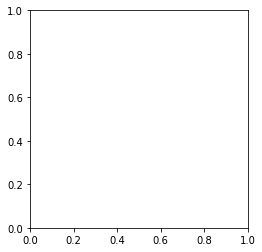

In [243]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[0].reshape(-1,28,28),cmap=plt.cm.binary)

In [245]:
X_test[0].reshape(-1,28,28).shape

(1, 28, 28)